In [1]:
from copy import copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

#### 1. Load in the summarized subject stroop data

In [2]:
df = pd.read_pickle('gp_stroop_v1.pkl')
NrSbj=len(df.sbjId.unique())
print('A total of ' + str(NrSbj) + ' subjects')
overallM = df.groupby('sbjId').sbjACC.mean().mean()
stroop_mean = 'Overall accuracy for the stroop task was ' + '{:.2f}'.format(overallM) + '%'
print(stroop_mean)

A total of 16 subjects
Overall accuracy for the stroop task was 94.31%


#### 2. Stroop task performance as a function of 2(Block Type: easy/hard) x 2 (Trial Type: congruent/incongruent)design 

- Mean accuracy

blockType  trialType
easy       con          95.019531
           inc          94.140625
hard       con          93.359375
           inc          94.726562
Name: sbjACC, dtype: float64


16

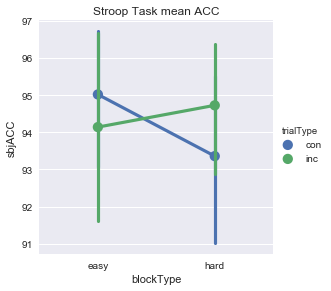

In [11]:
sns.factorplot(x='blockType',y = 'sbjACC', data=df, hue='trialType')
plt.title("Stroop Task mean ACC")
condMACC = df.groupby(['blockType','trialType']).sbjACC.mean()
print(condMACC)
condMACC.mean()

- Mean RT

21.0230576994
blockType  trialType
easy       con          592.691720
           inc          606.262837
hard       con          593.113767
           inc          585.661827
Name: sbjRT, dtype: float64


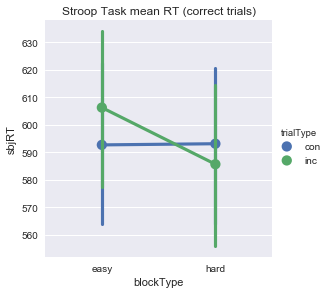

In [12]:
sns.factorplot(x='blockType',y = 'sbjRT', data=df, hue='trialType')
plt.title("Stroop Task mean RT (correct trials)")
condMRT = df.groupby(['blockType','trialType']).sbjRT.mean()
CSPC = condMRT[1]-condMRT[0]-(condMRT[3]-condMRT[2])
print(CSPC)
print(condMRT)

#### 3. Load in the summarized subject memory data, calculate overall memory performance

In [17]:
df = pd.read_pickle('gp_memory_v1.pkl')
CRrate = df.loc[df.blockType=='new','sbjACC'].mean()
acc_new='Overall memory accuracy for new items was ' + '{:.2f}'.format(CRrate) + '%'
print(acc_new)
overallOld = df.loc[df.blockType!='new','sbjACC'].mean()
acc_old='Overall memory accuracy for old items was ' + '{:.2f}'.format(overallOld) + '%'
print(acc_old)
print(100-CRrate)

Overall memory accuracy for new items was 77.58%
Overall memory accuracy for old items was 86.04%
22.421875


#### 4. Recognition memory performance as a function of 2(Block Type: easy/hard) x 2 (Trial Type: congruent/incongruent) design 

blockType  trialType
easy       con          87.695312
           inc          82.031250
hard       con          88.671875
           inc          85.742188
Name: sbjACC, dtype: float64

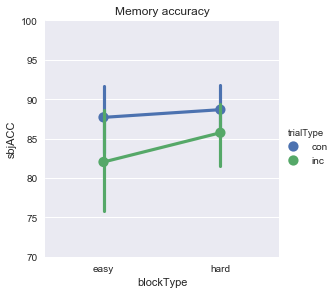

In [14]:
df2= copy(df.loc[df.blockType!='new'])
df2.blockType=pd.Categorical(df2.blockType, categories=['easy','hard'], ordered=True)
df2.trialType=pd.Categorical(df2.trialType, categories=['con','inc'], ordered=True)
sns.factorplot(x='blockType',y = 'sbjACC', data=df2, hue='trialType')
plt.ylim(70,100)
plt.title('Memory accuracy')
df2.groupby(['blockType','trialType']).sbjACC.mean()

#### 5. Memory D-prime: z(Hits)-z(FA)

blockType  trialType
easy       con          0.170487
           inc         -0.411174
hard       con          0.270773
           inc         -0.030086
Name: dprime, dtype: float64

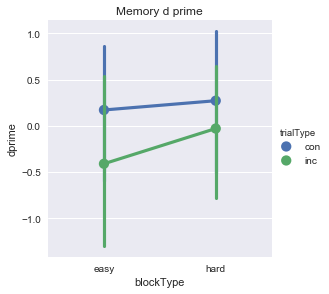

In [18]:
df_new = df.loc[df.blockType=='new',['sbjACC','sbjId']]
df_new['zFA'] = stats.zscore(1-(df_new.sbjACC/100))
df_new.drop('sbjACC',axis=1,inplace=True)
df2 = df2.merge(df_new)
df2['zHits'] = stats.zscore(df2.sbjACC/100)
df2['dprime']=df2.zHits - df2.zFA
sns.factorplot(x='blockType',y = 'dprime', data=df2, hue='trialType')
#plt.ylim(-1.5,1.5)
plt.title('Memory d prime')
df2.groupby(['blockType','trialType']).dprime.mean()

#### 6. Source memory performance

blockType  trialType
easy       con          46.191406
           inc          48.437500
hard       con          48.046875
           inc          45.312500
Name: sbjACC, dtype: float64

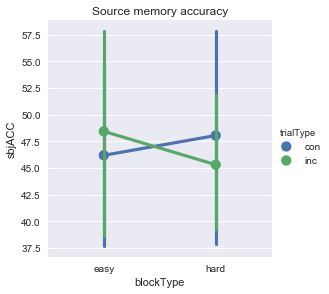

In [19]:
df = pd.read_pickle('gp_sourceMem_v1.pkl')
sns.factorplot(x='blockType',y = 'sbjACC', data=df, hue='trialType')
plt.title('Source memory accuracy')
df.groupby(['blockType','trialType']).sbjACC.mean()

#### 7. Auditory probe detection accuracy

In [ ]:
df = pd.read_pickle('gp_memory_v1.pkl')
probe_new = df.loc[df.blockType=='new','probeACC'].mean()
probe_old = df.loc[df.blockType!='new','probeACC'].mean()
print('Overall tone detection following new items was ' + '{:.2f}'.format(probe_new) + '%')

In [ ]:
df2= copy(df.loc[df.blockType!='new'])
df2.blockType=pd.Categorical(df2.blockType, categories=['easy','hard'], ordered=True)
df2.trialType=pd.Categorical(df2.trialType, categories=['con','inc'], ordered=True)
sns.factorplot(x='blockType',y = 'probeACC', data=df2, hue='trialType')
plt.title('Probe detection accuracy')
df2.groupby(['blockType','trialType']).probeACC.mean()

- seems like subjects have been responding 'n' to all trials